In [1]:
import sklearn as sk
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp
import scipy.stats as st
from pandas import DataFrame
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error

Шаг 1. Читаем данные о погоде из файла Test.csv в таблицу данных:

In [2]:
readdata = pd.read_csv("Test.csv", sep = ";", encoding = "UTF-8", error_bad_lines = False)
matrixRead = readdata.dropna(axis = 1, how = "all")

Шаг 2. Считаем линейную регрессию с помощью библиотек:

Коэффициент b =  [-0.23478041]
Коэффициент a =  [24.35839536]


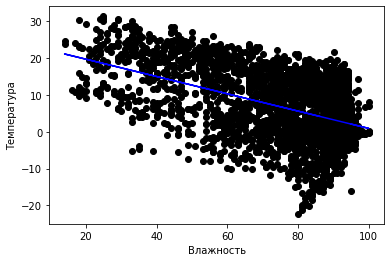

In [3]:
x = matrixRead["U"].values
y = matrixRead["T"].values
length = len(x)
x = x.reshape(length,1)
y = y.reshape(length,1)
regr = linear_model.LinearRegression()
regr.fit(x, y)
y_pred = regr.predict(x)
print("Коэффициент b = ", regr.coef_[0])
print("Коэффициент a = ", regr.intercept_)

fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.set_ylabel("Температура")
ax1.set_xlabel("Влажность")
ax1.plot(x, regr.predict(x), color = "blue")
ax1.scatter(x, y,  color = "black")

plt.show()

Шаг 3. Считаем линейную регрессию вручную:

218986
Коэффициент b =  -0.2347804116067848
Коэффициент a =  24.35839535911288


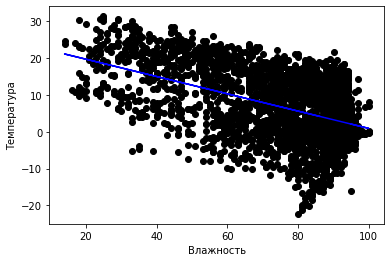

In [4]:
averageX = 0
averageY = 0
averageXY = 0
dispersiaX = 0
dispersiaY = 0

x = matrixRead["U"].values
y = matrixRead["T"].values
for i in range(length):
    averageX += x[i]
    averageY += y[i]
    averageXY += x[i] * y[i]
    dispersiaX += x[i] * x[i]
    dispersiaY += y[i] * y[i]
print(averageX)

averageX /= length
averageY /= length
averageXY /= length
dispersiaX = dispersiaX / length - averageX * averageX
dispersiaY = dispersiaY / length - averageY * averageY
sigmaX = dispersiaX ** 0.5
sigmaY = dispersiaY ** 0.5

b = (averageXY - averageX * averageY) / (dispersiaX)
a = averageY - b * averageX

fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.set_ylabel("Температура")
ax1.set_xlabel("Влажность")
ax1.plot(x, b * x + a, color = "blue")
ax1.scatter(x, y, color = "black")

print("Коэффициент b = ", b)
print("Коэффициент a = ", a)

Шаг 4. Строим авторегрессионную модель:

C:\Users\Sergey\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


                              ARMA Model Results                              
Dep. Variable:                      T   No. Observations:                   20
Model:                     ARMA(1, 1)   Log Likelihood                 -21.630
Method:                       css-mle   S.D. of innovations              0.626
Date:                Thu, 21 Jan 2021   AIC                             51.260
Time:                        17:18:21   BIC                             55.243
Sample:                             0   HQIC                            52.038
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.6552      1.236     -0.530      0.596      -3.077       1.767
ar.L1.T        0.8095      0.123      6.605      0.000       0.569       1.050
ma.L1.T        0.9999      0.205      4.881      0.0

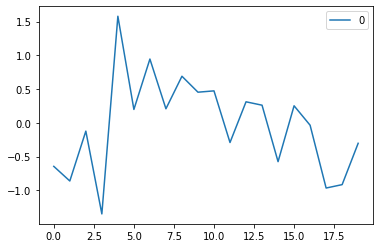

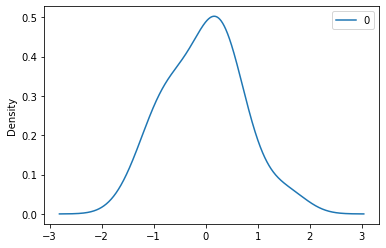

In [5]:
from statsmodels.tsa.arima_model import ARMA, ARIMA
model = ARMA(matrixRead["T"][0:20], (1,1))
model_fit = model.fit(disp=1)
print(model_fit.summary())

residuals = DataFrame(model_fit.resid)
residuals.rename_axis("T")
residuals.plot()
plt.show()
residuals.plot(kind = "kde")
plt.show()

Шаг 5. Делаем предсказания изменения температуры:

In [ ]:
testing = matrixRead["T"].values
trainSize = 20
predSize = 20
train, test = testing[0:trainSize], testing[trainSize:trainSize+predSize]    

history = [x for x in train]
predictions = list()
model = ARIMA(history, order = (3,2,1))
model_fit = model.fit(disp = 0)
for i in range(len(test)):
    model = ARIMA(history, order = (3,2,1))
    model_fit = model.fit(disp = 0)
    prediction = model_fit.forecast()[0]
    predictions.append(prediction)
    real = test[i]
    history.append(real)
fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.set_ylabel("Температура")
ax1.set_xlabel("Время")
ax1.plot(test, color = "blue")
ax1.plot(predictions, color = "red")
plt.show()

C:\Users\Sergey\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\Users\Sergey\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.

C:\Users\Sergey\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\Users\Sergey\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.

Шаг 6. Считаем RMS ошибку между предсказанной и действительной величиной температуры:

In [ ]:
summ = 0
for i in range(len(predictions)):
    summ += (predictions[i] - test[i]) * (predictions[i] - test[i])
summ /= len(predictions)
summ **= 0.5
print("RMS-ошибка предсказаний, посчитанная вручную = ", summ)
print("RMS-ошибка предсказаний, посчитанная функцией = ", mean_squared_error(test,predictions) ** 0.5)

Шаг 7. Дальнейшее предсказание с помощью ARIMA модели:

In [ ]:
trainSize = 100
testSize = 20
train = testing[0 : trainSize]
real = testing[trainSize + 1 : trainSize + testSize + 1]
model = ARIMA(history, order = (3,2,1))
model_fit = model.fit(disp = 0)
preds = model_fit.predict(testSize)

for i in range(testSize):
    preds[i] = preds[i] + testing[trainSize + 1 + i]
plt.plot(real)
plt.plot(preds)
plt.show()

summ = 0
for i in range(testSize):
    summ += (real[i] - preds[i]) * (real[i] - preds[i])
summ /= len(preds)
summ **= 0.5
print("RMS-ошибка предсказаний, посчитанная вручную = ", summ)
print("RMS-ошибка предсказаний, посчитанная функцией = ", mean_squared_error(real,preds) ** 0.5)